In [2]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

#해안선 받아놓기
coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')  

In [3]:
#해저지형
UNDER_SEA = gpd.read_file('./Ex/220105/해저지형(1min)_유효값.shp', encoding='utf8')
#계측기
buffer = gpd.read_file('./Ex/220105/계측기.shp', encoding='euckr')
#허가구역
allow = gpd.read_file('./Ex/220105/해상풍력 발전사업허가.shp', encoding='euckr')

In [6]:
allow.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [97]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=1)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')


In [100]:
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')

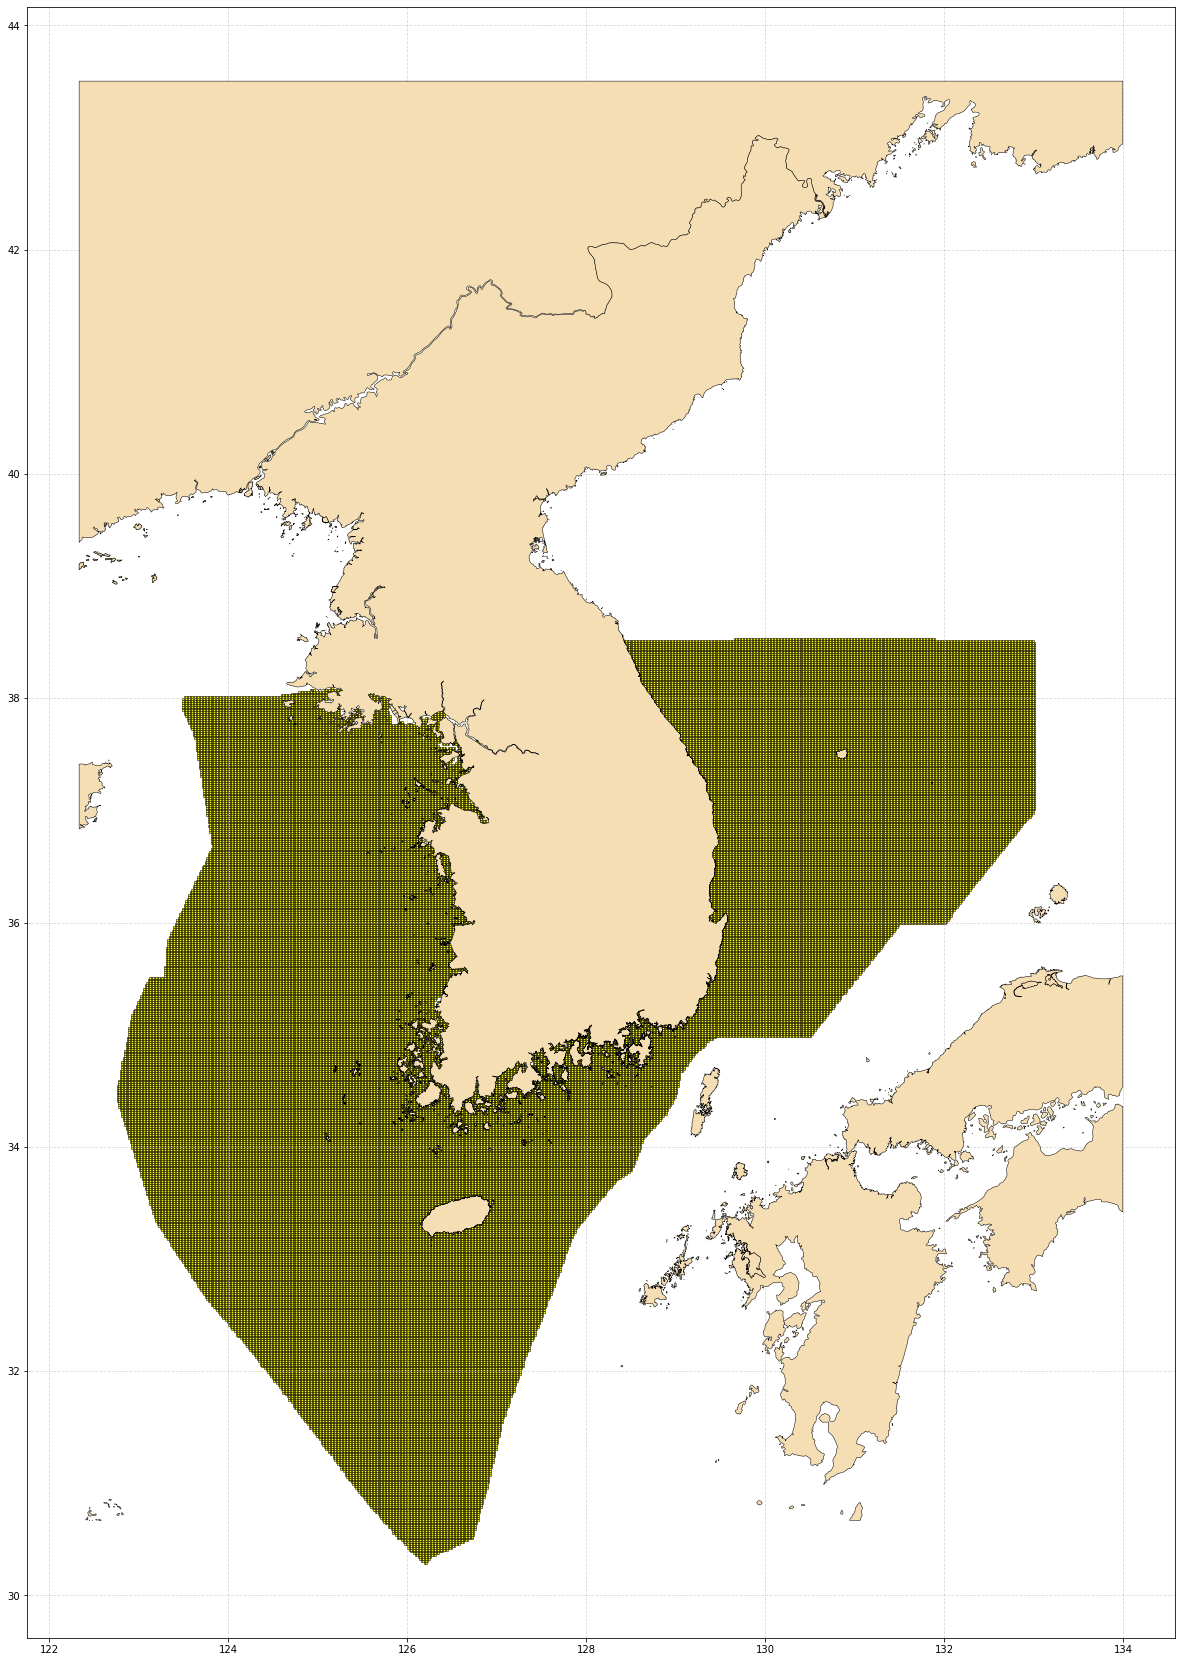

In [90]:
plot_map(UNDER_SEA)

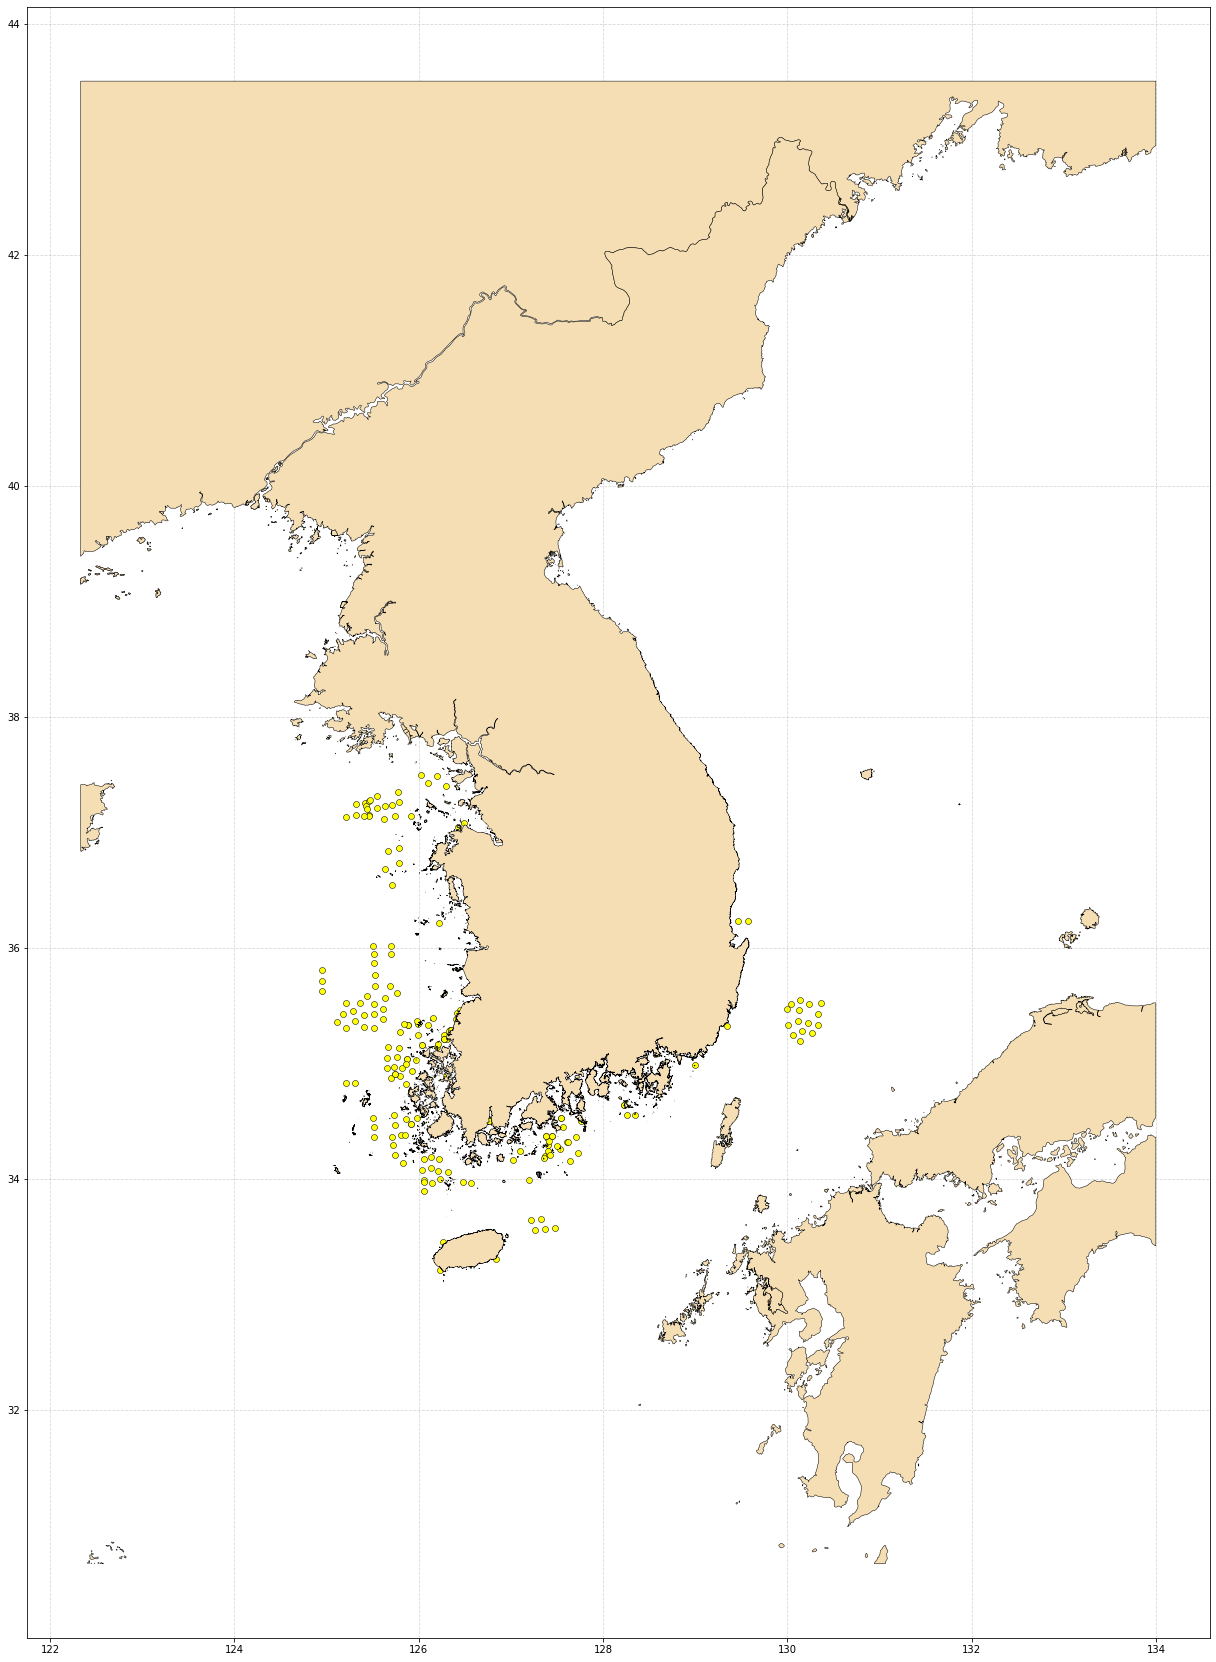

In [91]:
plot_map(buffer)

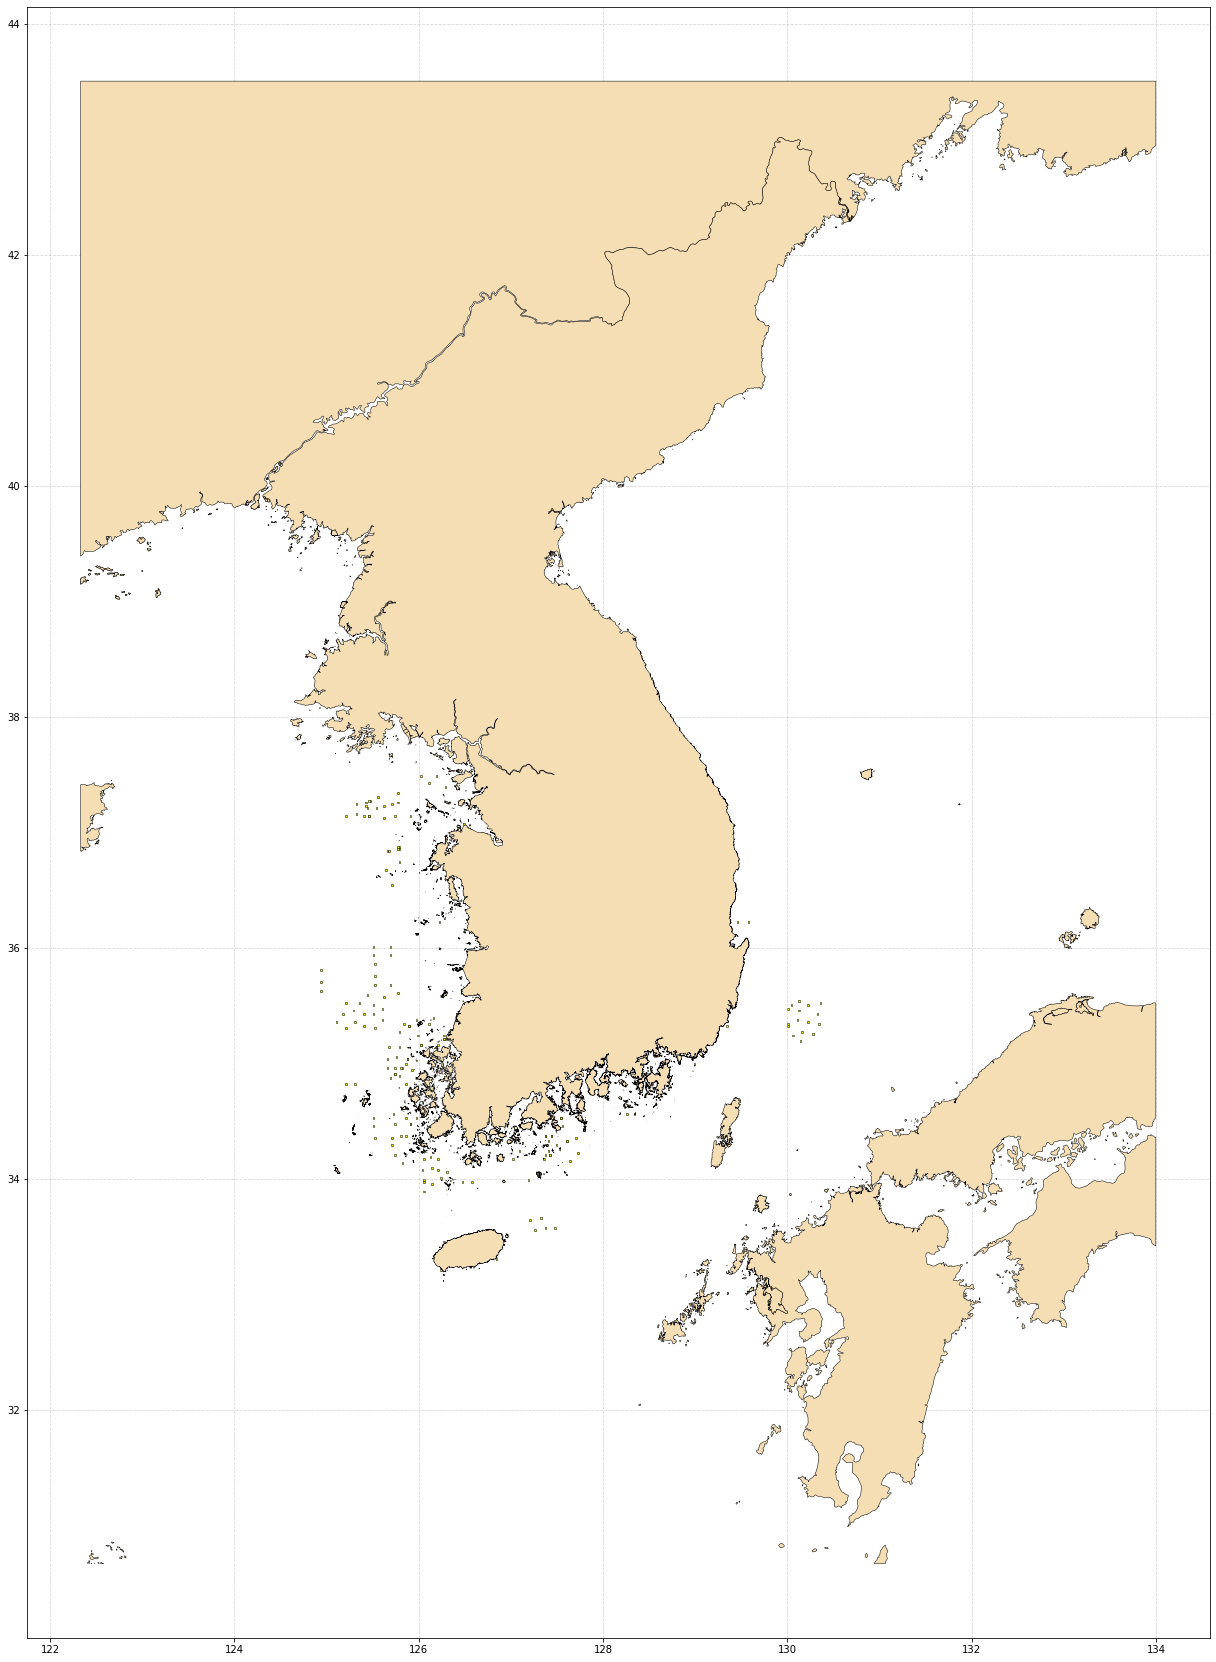

In [92]:
result1 = gpd.sjoin(UNDER_SEA, buffer, how='inner', op='intersects')
plot_map(result1)

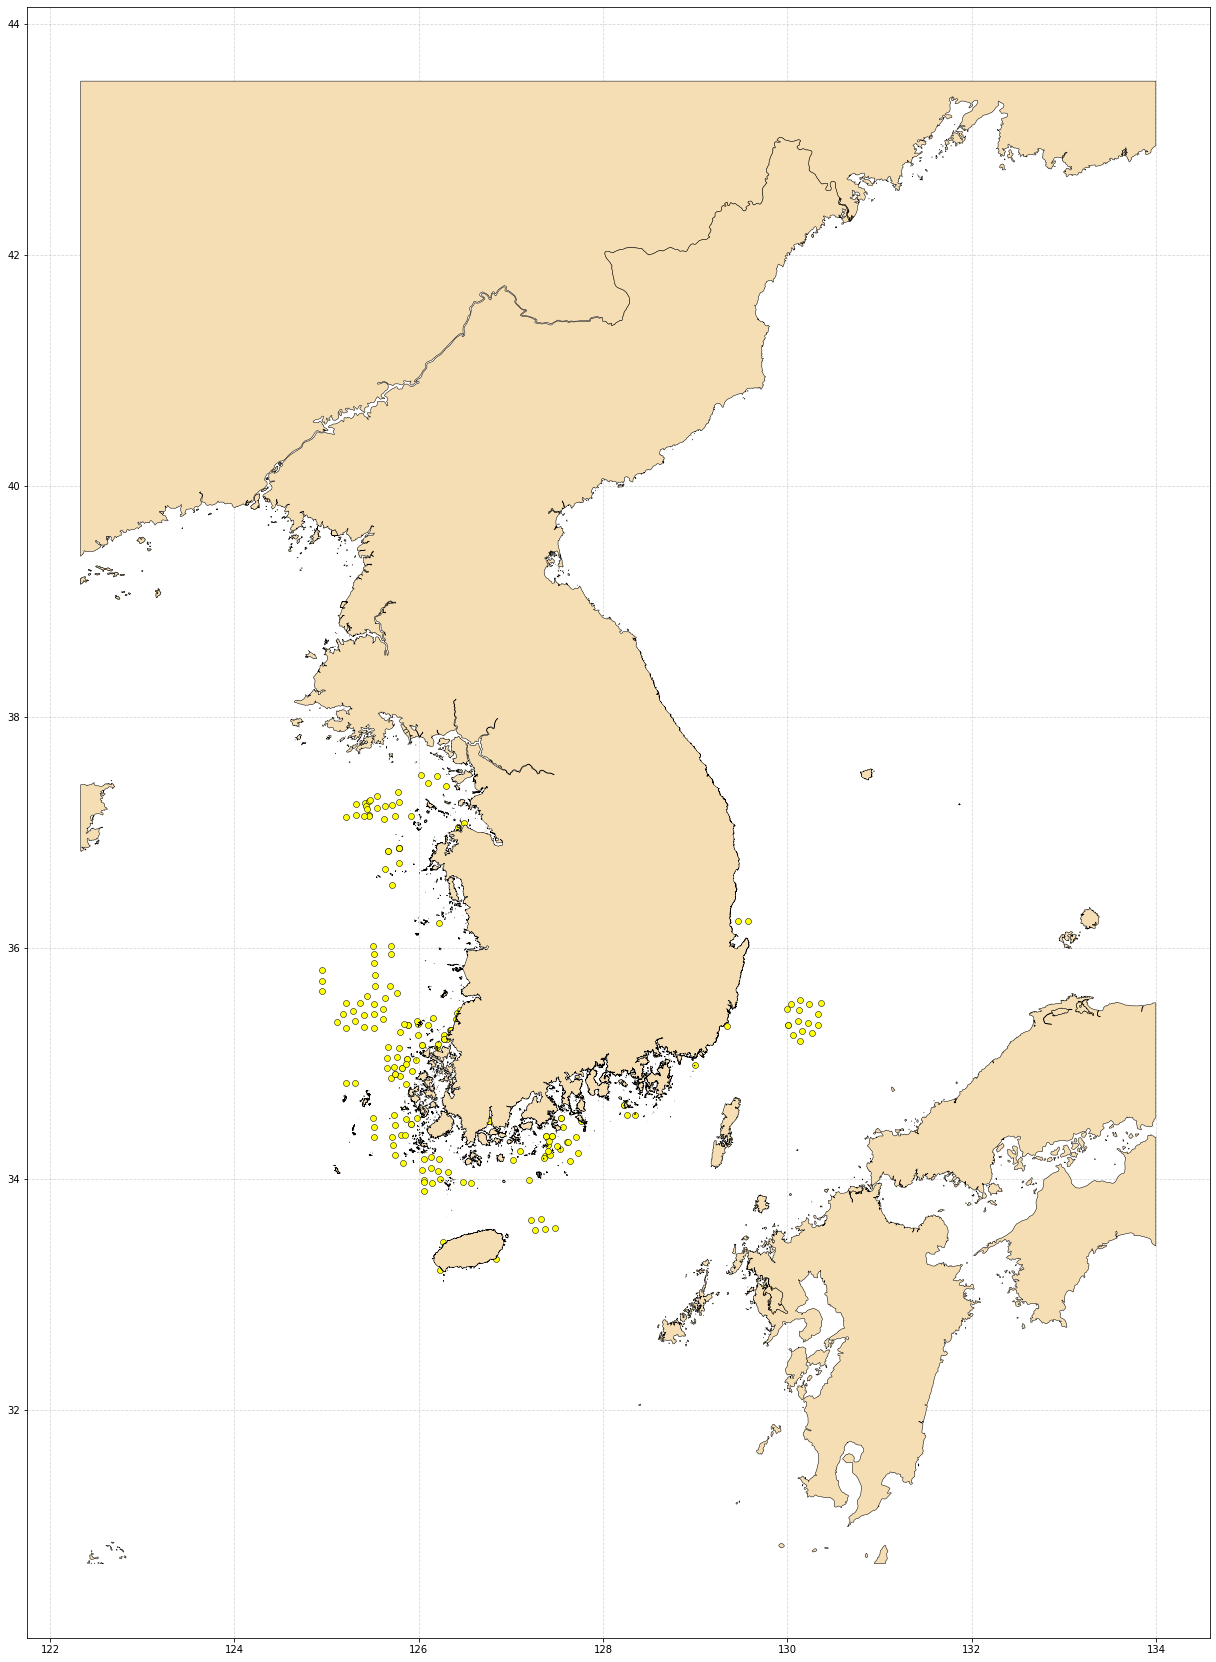

In [93]:
result1 = gpd.sjoin(buffer, UNDER_SEA, how='inner', op='intersects')
plot_map(result1)

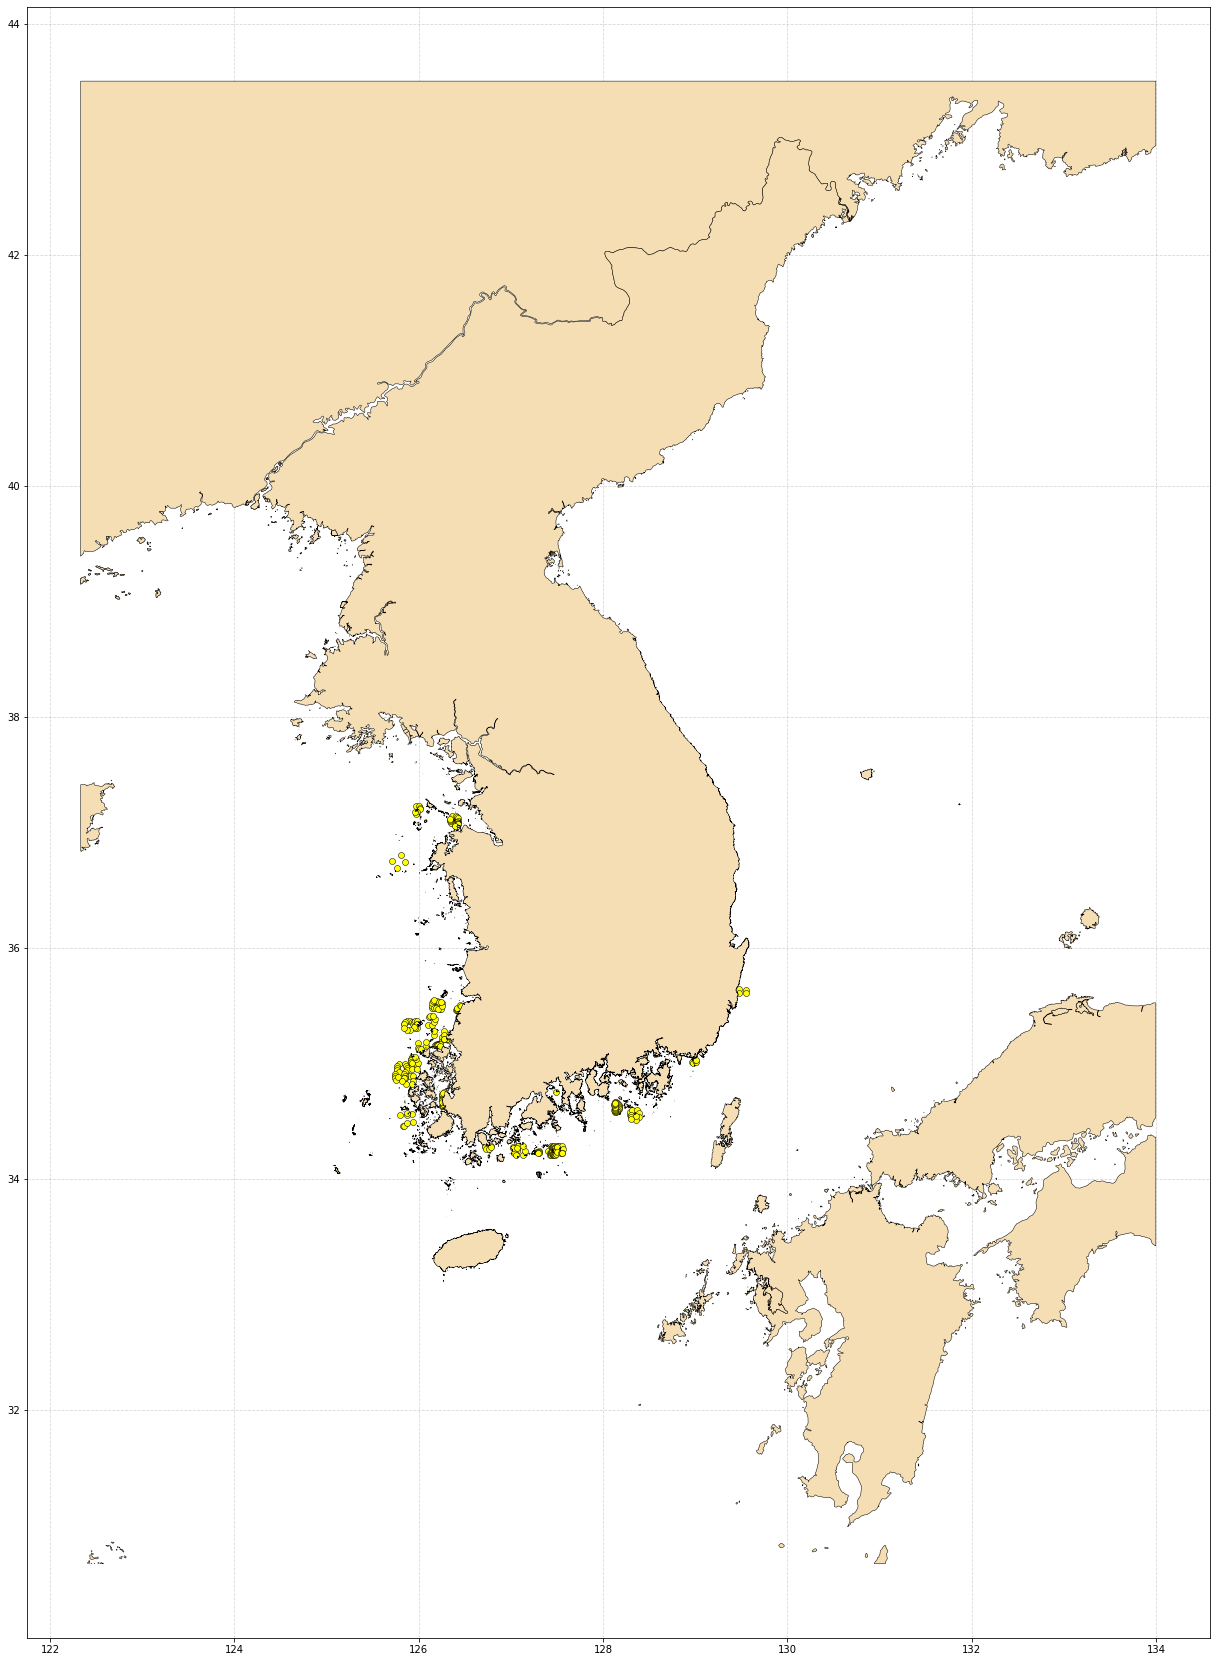

In [24]:
plot_map(allow)

C:\Users\PPARK\AppData\Local\Temp/ipykernel_9896/1803197033.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex5/허가구역이랑해저지형조인.shp', encoding='euckr')


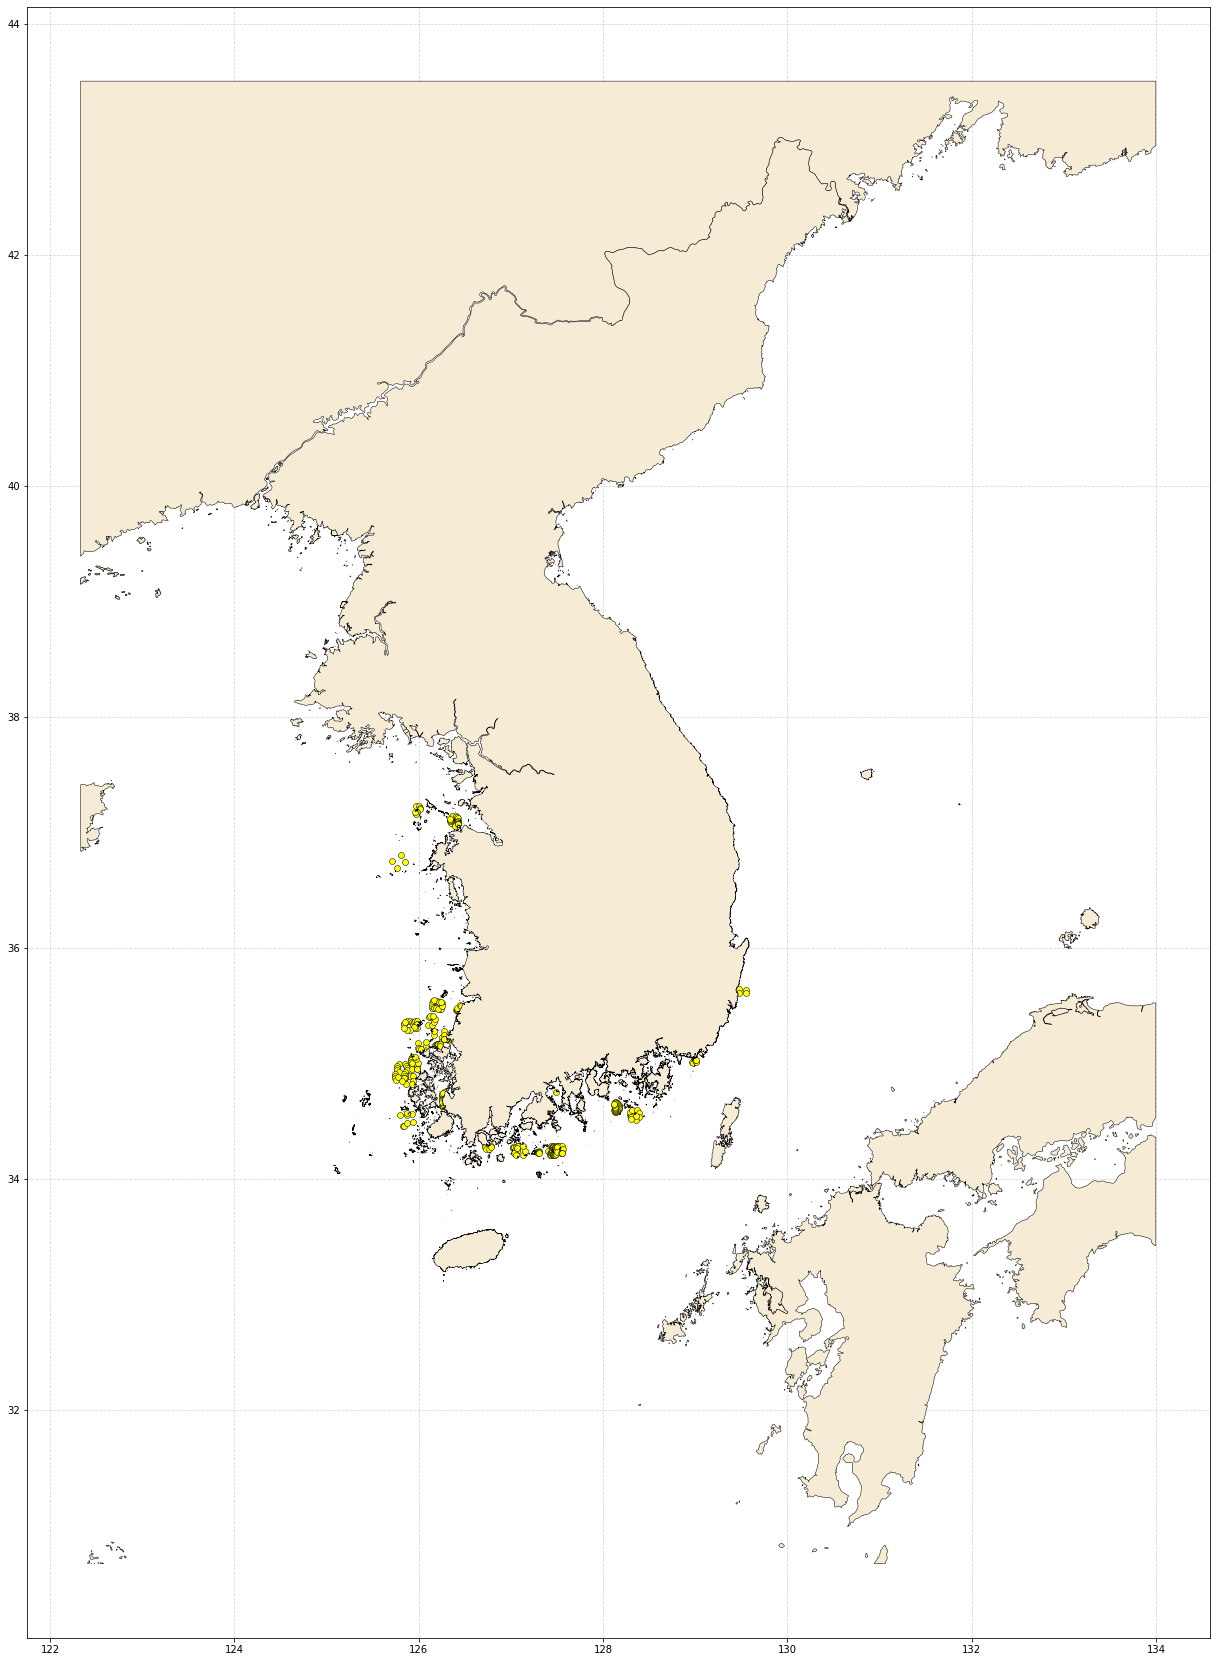

In [98]:
result1 = gpd.sjoin(allow, UNDER_SEA, how='inner', op='intersects')
result1.to_file('./result/ex5/허가구역이랑해저지형조인.shp', encoding='euckr')
plot_map(result1)

In [ ]:
# 수심 60m이하만
UNDER_SEA_60m = UNDER_SEA[UNDER_SEA['ELEVATION']>=-60]

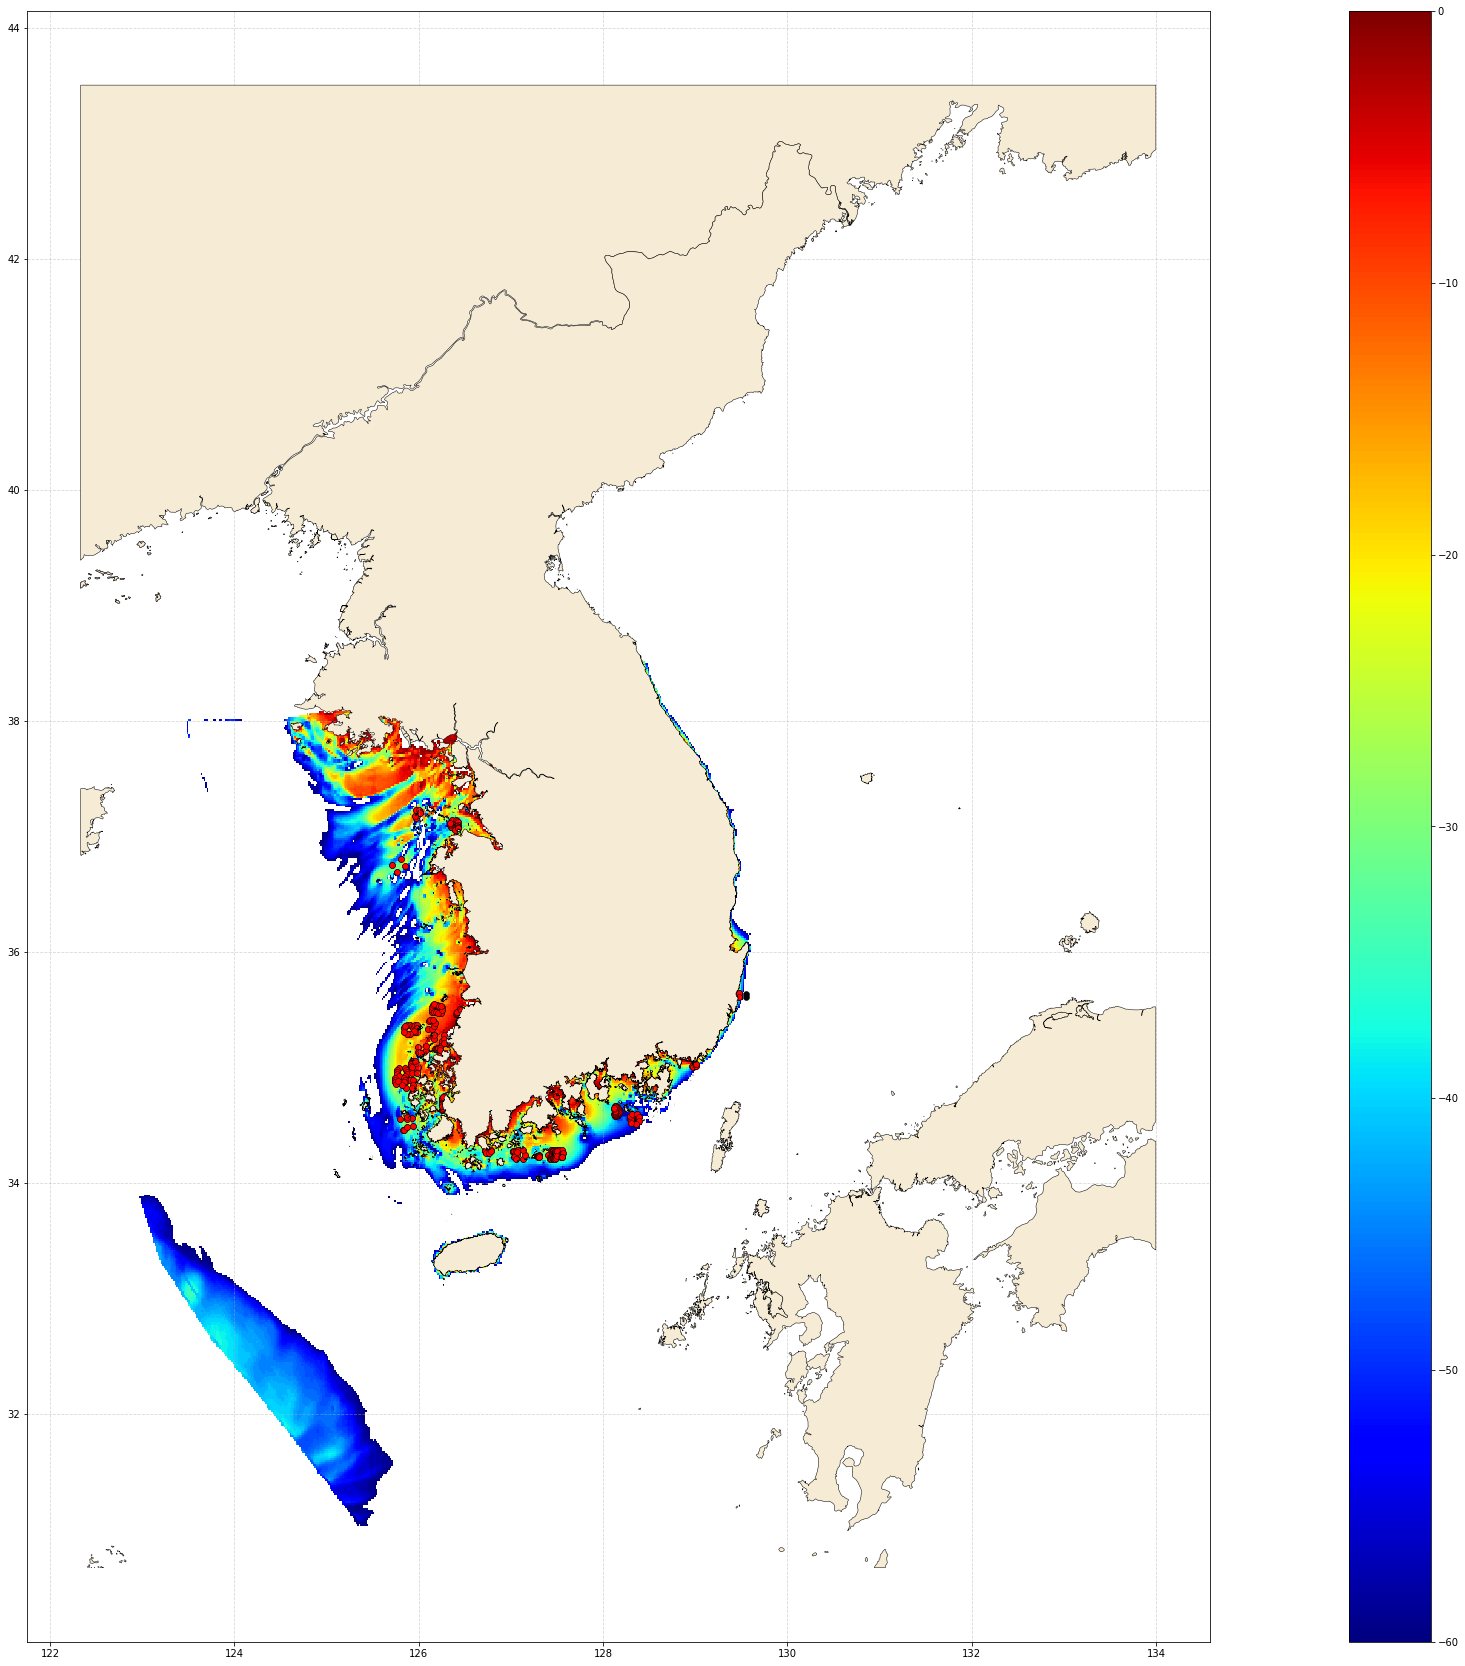

In [95]:
result1_60m = result1[result1['ELEVATION']>=-60]
plot_colormap(UNDER_SEA_60m, 'ELEVATION', 10, data2= result1, data3= result1_60m)

C:\Users\PPARK\AppData\Local\Temp/ipykernel_9896/2309125696.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result1.to_file('./result/ex5/계측기랑해저지형조인.shp', encoding='euckr')


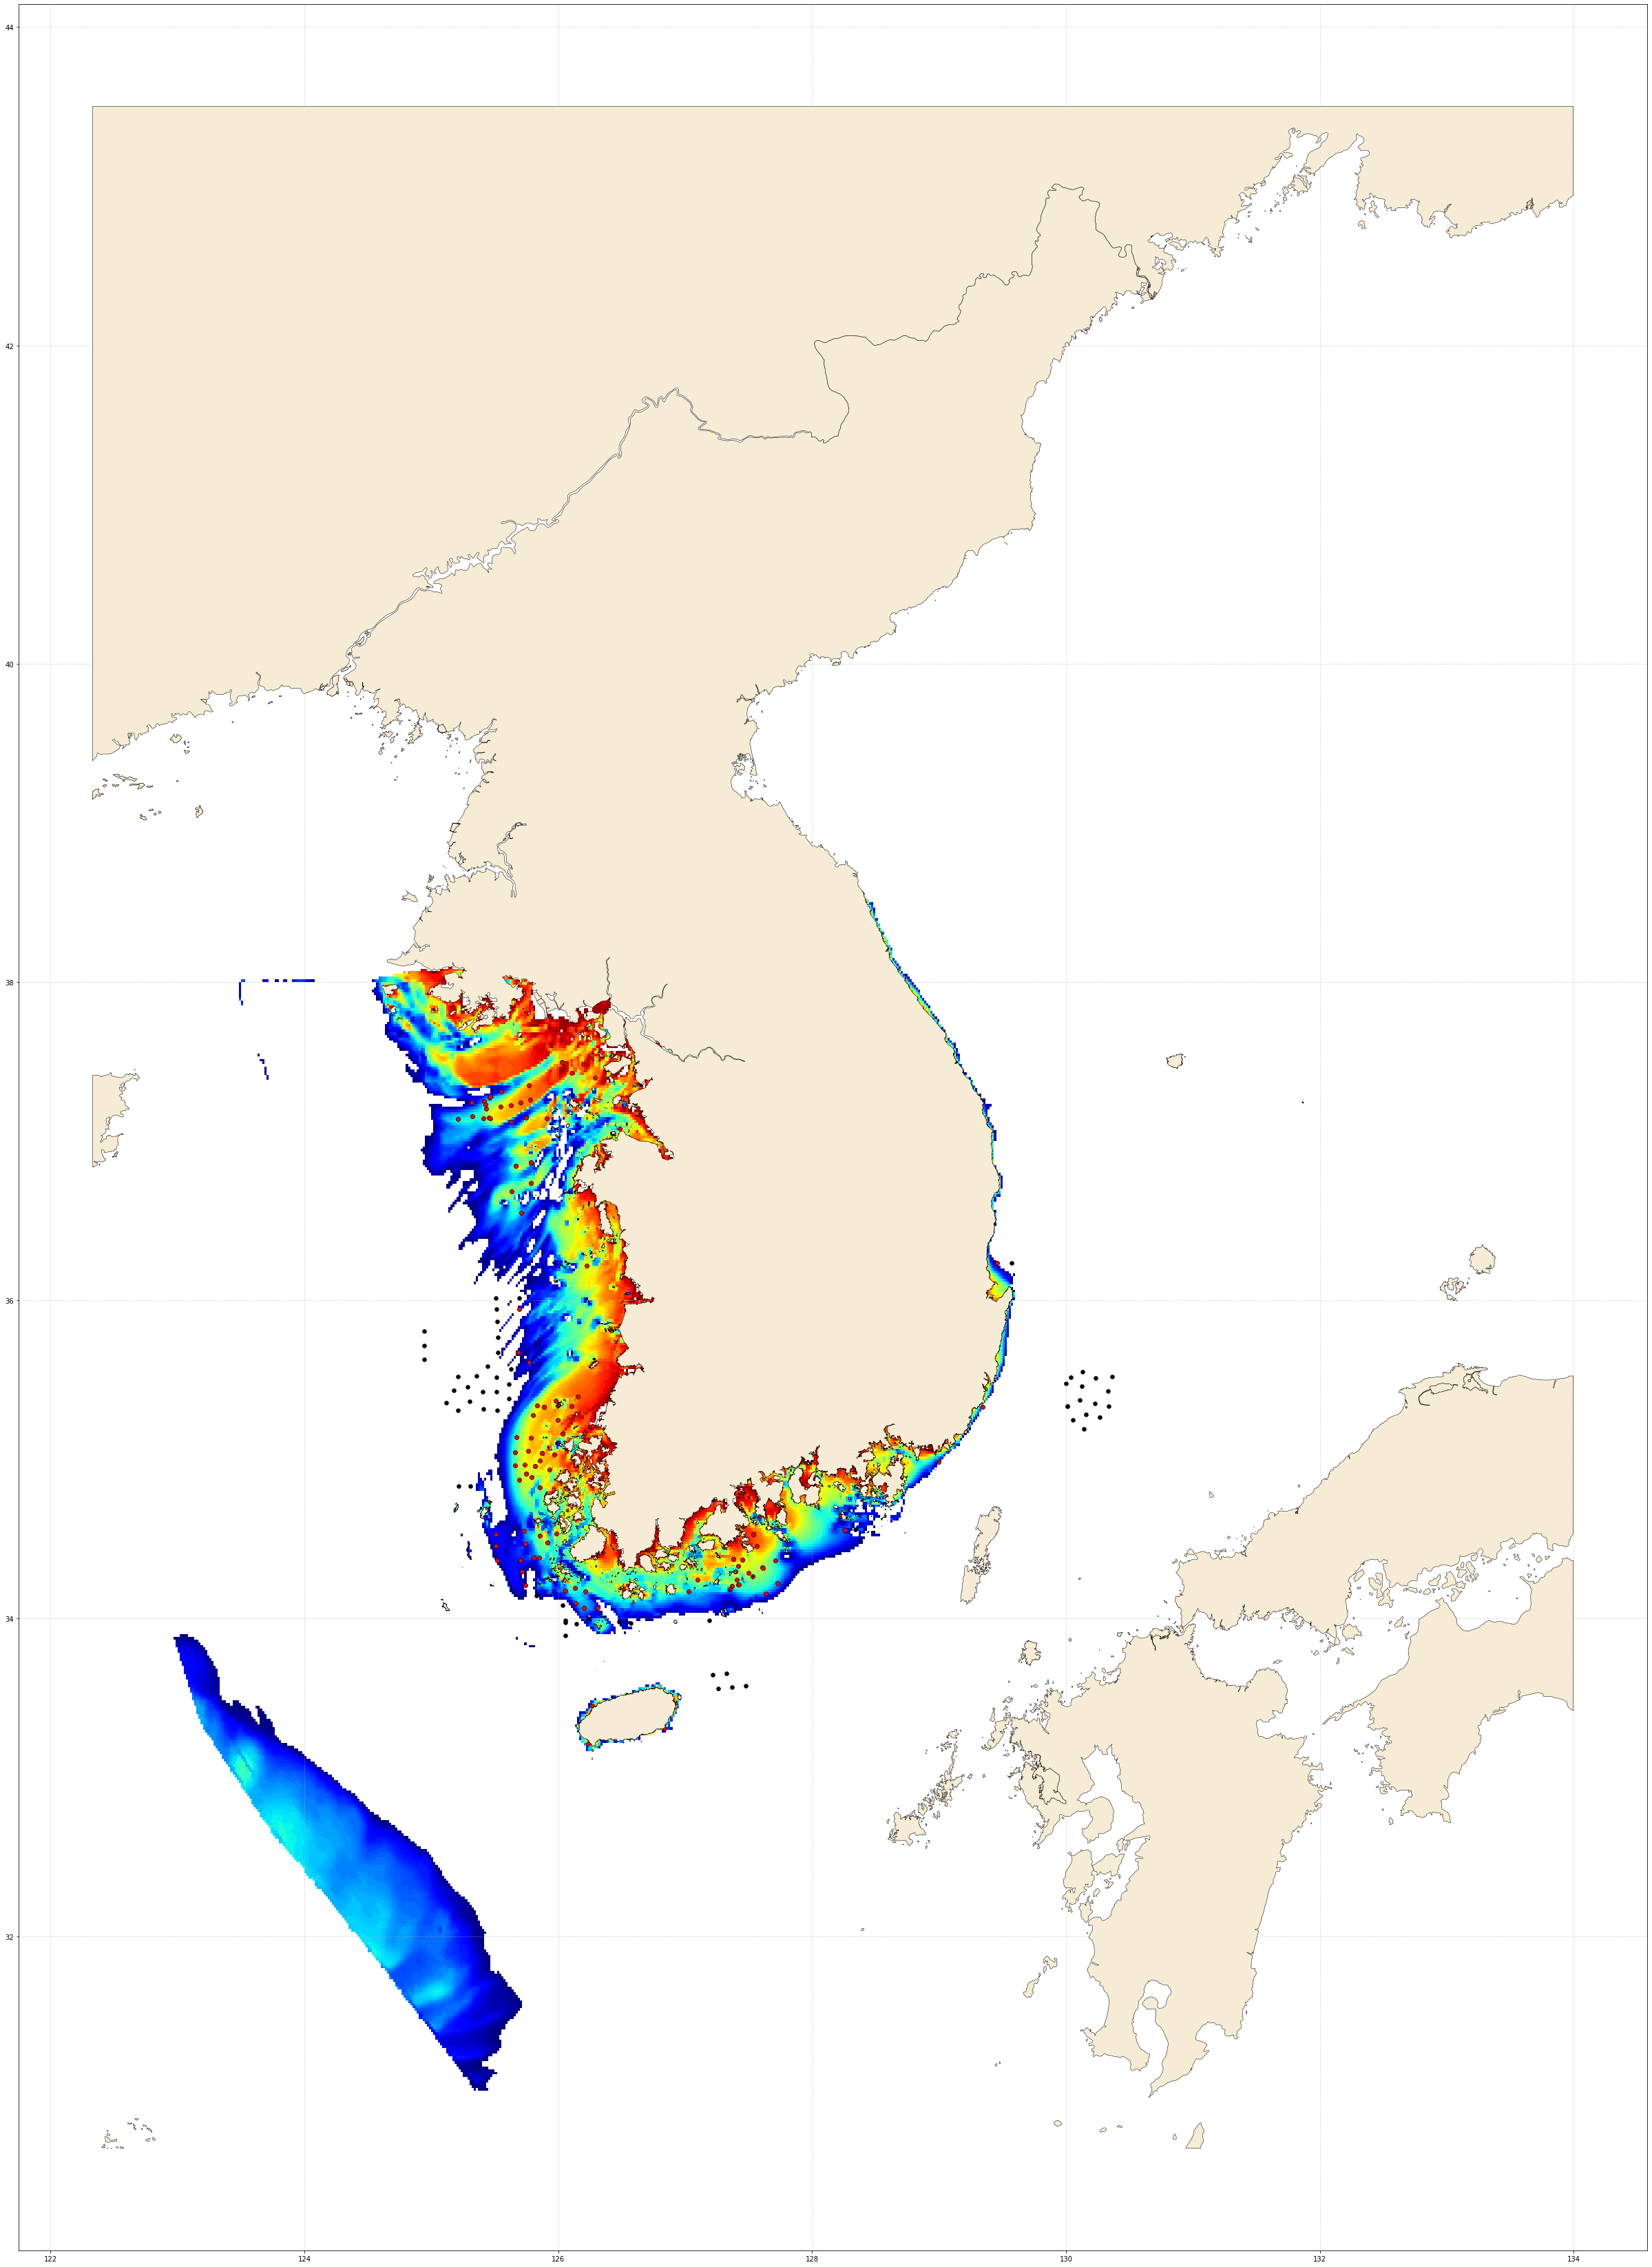

In [103]:
#계측기
result1 = gpd.sjoin(buffer, UNDER_SEA, how='inner', op='intersects')
result1.to_file('./result/ex5/계측기랑해저지형조인.shp', encoding='euckr')
result1_60m = result1[result1['ELEVATION']>=-60]
plot_colormap(UNDER_SEA_60m, 'ELEVATION', 10, data2= result1, data3 = result1_60m, figsize = [60,60])
plt.savefig('20220106.png', dpi=300)